In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")
df.head()

C:\Users\drogu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.describe().columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype2', 'attacktype3', 'targtype1',
       'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2',
       'targtype3', 'targsubtype3', 'natlty3', 'guncertain1', 'guncertain2',
       'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3',
       'compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2',
       'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus',
       'nhours', 'ndays', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid',
       'ransompaidus', 'hostkidoutc

### Data cleaning

In [4]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','individual','natlty1_txt','gname','weaptype1_txt','nkill']]

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','natlty1_txt':'Nationality_target','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,individual,Nationality_target,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,0,Dominican Republic,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),0,Belgium,23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,0,United States,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),0,United States,Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),0,United States,Unknown,Incendiary,NaN


<AxesSubplot:>

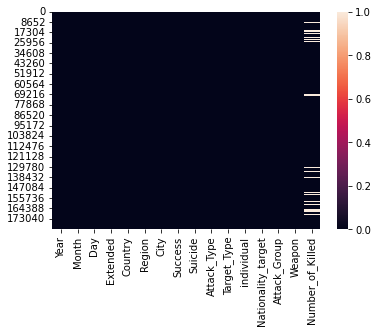

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

In [7]:
df['City'].isnull().sum()
df['City'].fillna('Unknown',inplace=True)

In [8]:
df['Nationality_target'].isnull().sum()
df['Nationality_target'].fillna('Unknown',inplace=True)

In [9]:
df.isnull().sum()

Year                      0
Month                     0
Day                       0
Extended                  0
Country                   0
Region                    0
City                      0
Success                   0
Suicide                   0
Attack_Type               0
Target_Type               0
individual                0
Nationality_target        0
Attack_Group              0
Weapon                    0
Number_of_Killed      10313
dtype: int64

In [10]:
df['Number_of_Killed'].fillna(df['Number_of_Killed'].mode()[0],inplace=True)
df['Number_of_Killed'].value_counts()

0.0      98462
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: Number_of_Killed, Length: 205, dtype: int64

<AxesSubplot:>

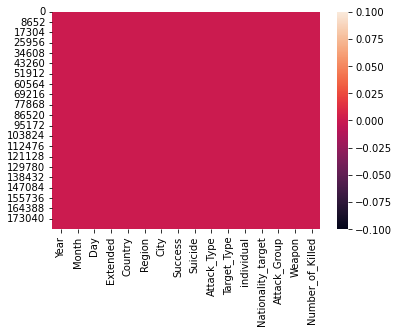

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.duplicated().count()

181691

<AxesSubplot:title={'center':'Duplicated values'}>

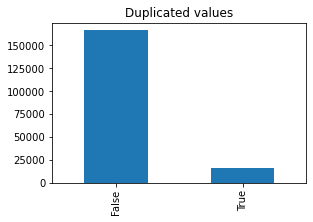

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
df.duplicated().value_counts().plot(kind='bar',title='Duplicated values')

In [14]:
df.drop_duplicates(keep=False,inplace=True)

In [15]:
df.duplicated().value_counts()

False    159173
dtype: int64

### EDA

<AxesSubplot:title={'center':'Terrorist activities followed by each year'}>

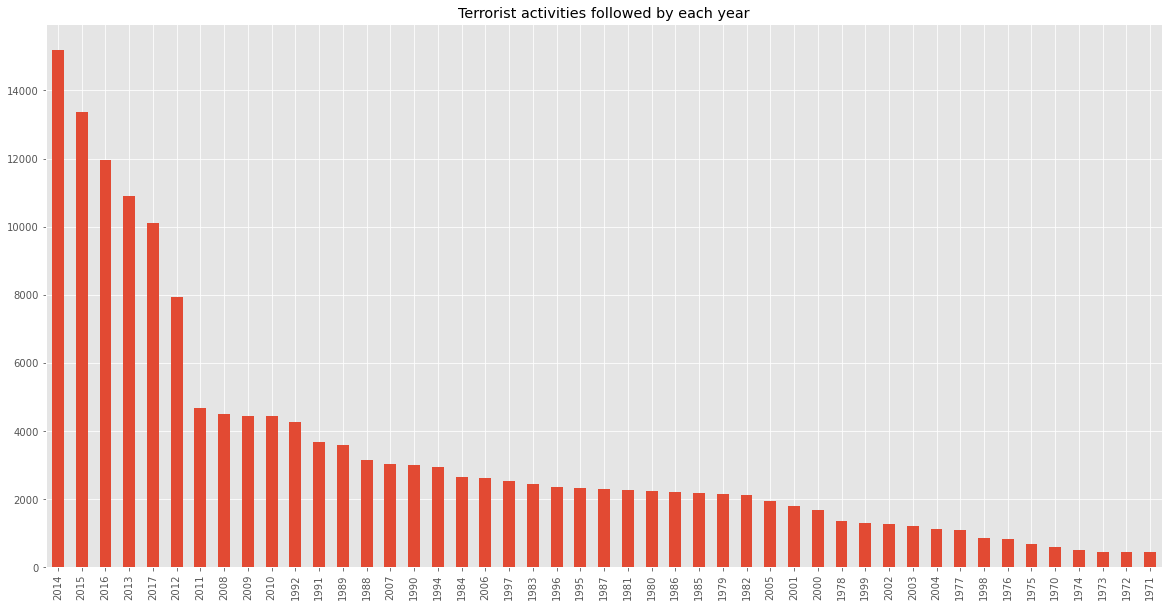

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['Year'].value_counts().plot.bar(title='Terrorist activities followed by each year',rot=90,figsize=[20,10])

<AxesSubplot:title={'center':'Countries where the incident occurred.'}>

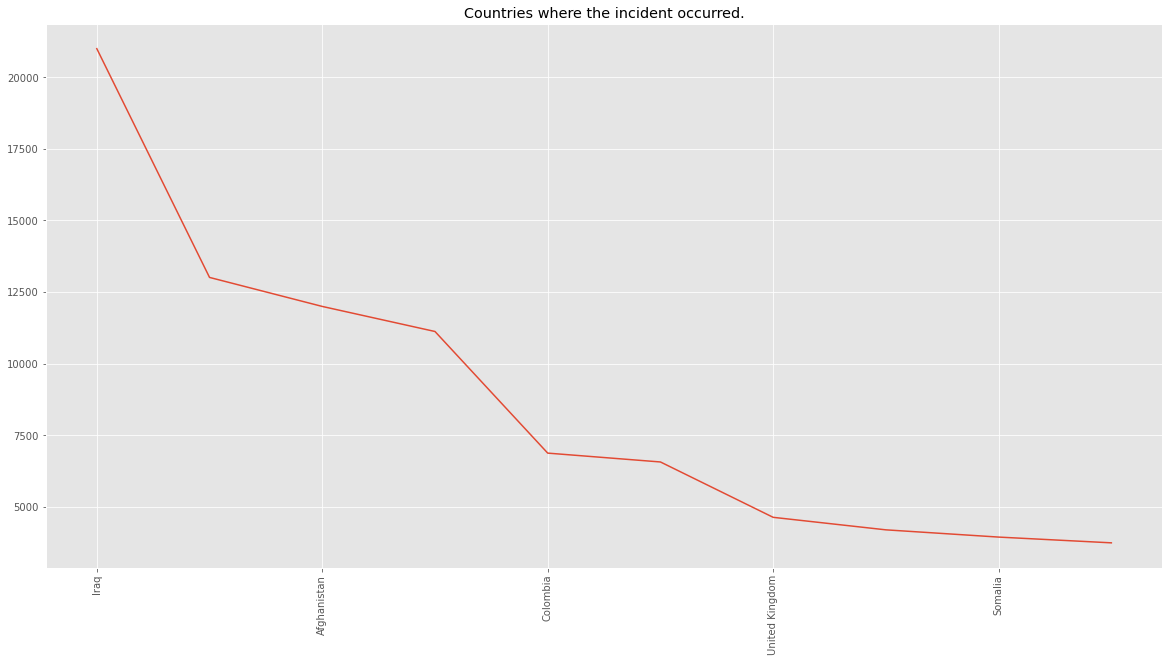

In [17]:
plt.style.use('ggplot')
df['Country'].value_counts().head(10).plot.line(title='Countries where the incident occurred.',rot=90,figsize=[20,10])

<AxesSubplot:title={'center':'Cities where the incident occurred.'}>

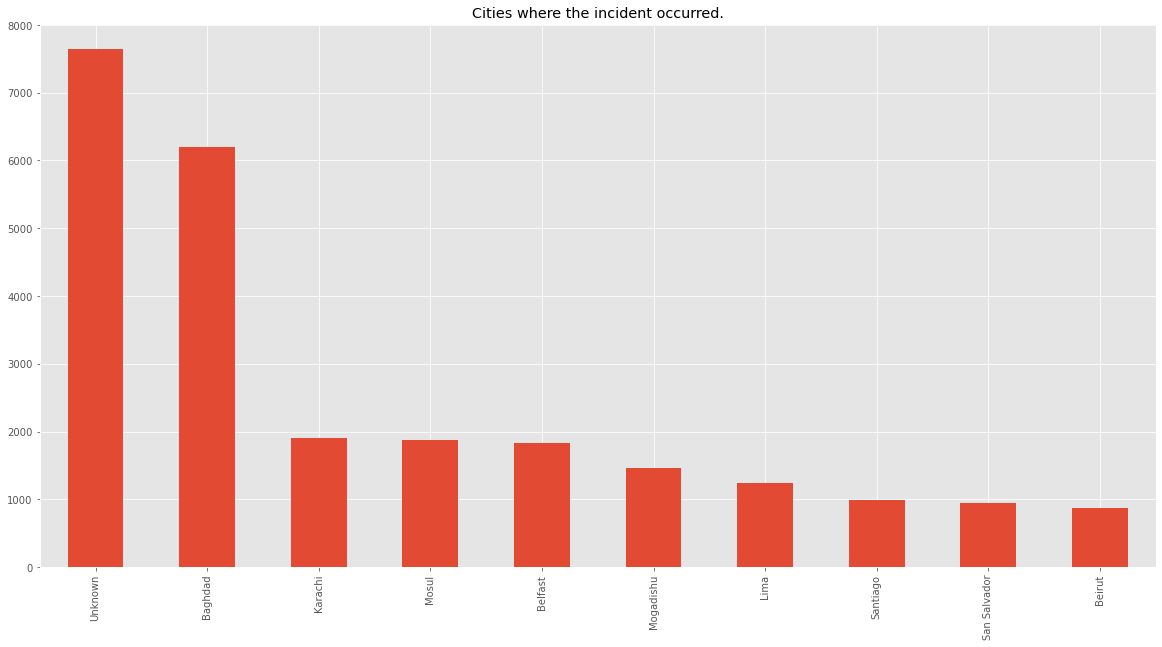

In [18]:
plt.style.use('ggplot')
df['City'].value_counts().head(10).plot.bar(title='Cities where the incident occurred.',rot=90,figsize=[20,10])

<AxesSubplot:title={'center':'Success of terrorist strike'}>

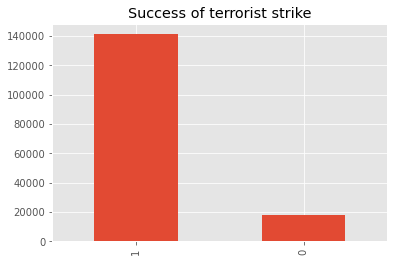

In [19]:
plt.style.use('ggplot')
df['Success'].value_counts().plot.bar(title='Success of terrorist strike',rot=90)

'1 = "Yes" The incident was a suicide attack. 0 = "No"'

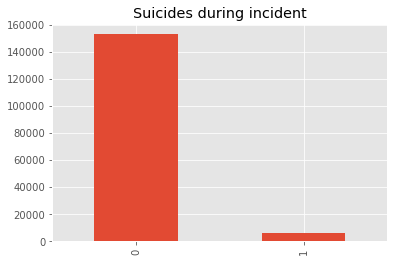

In [20]:
plt.style.use('ggplot')
df['Suicide'].value_counts().plot.bar(title='Suicides during incident',rot=90)
display('1 = "Yes" The incident was a suicide attack. 0 = "No"')

<AxesSubplot:title={'center':'Attack types'}>

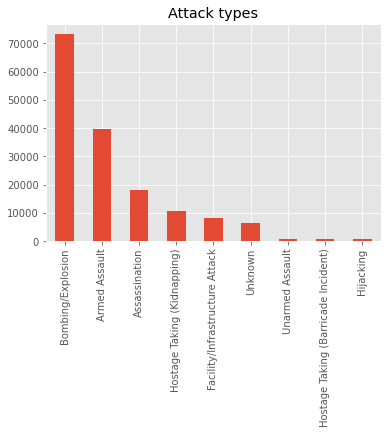

In [21]:
plt.style.use('ggplot')
df['Attack_Type'].value_counts().plot.bar(title='Attack types',rot=90)

<AxesSubplot:>

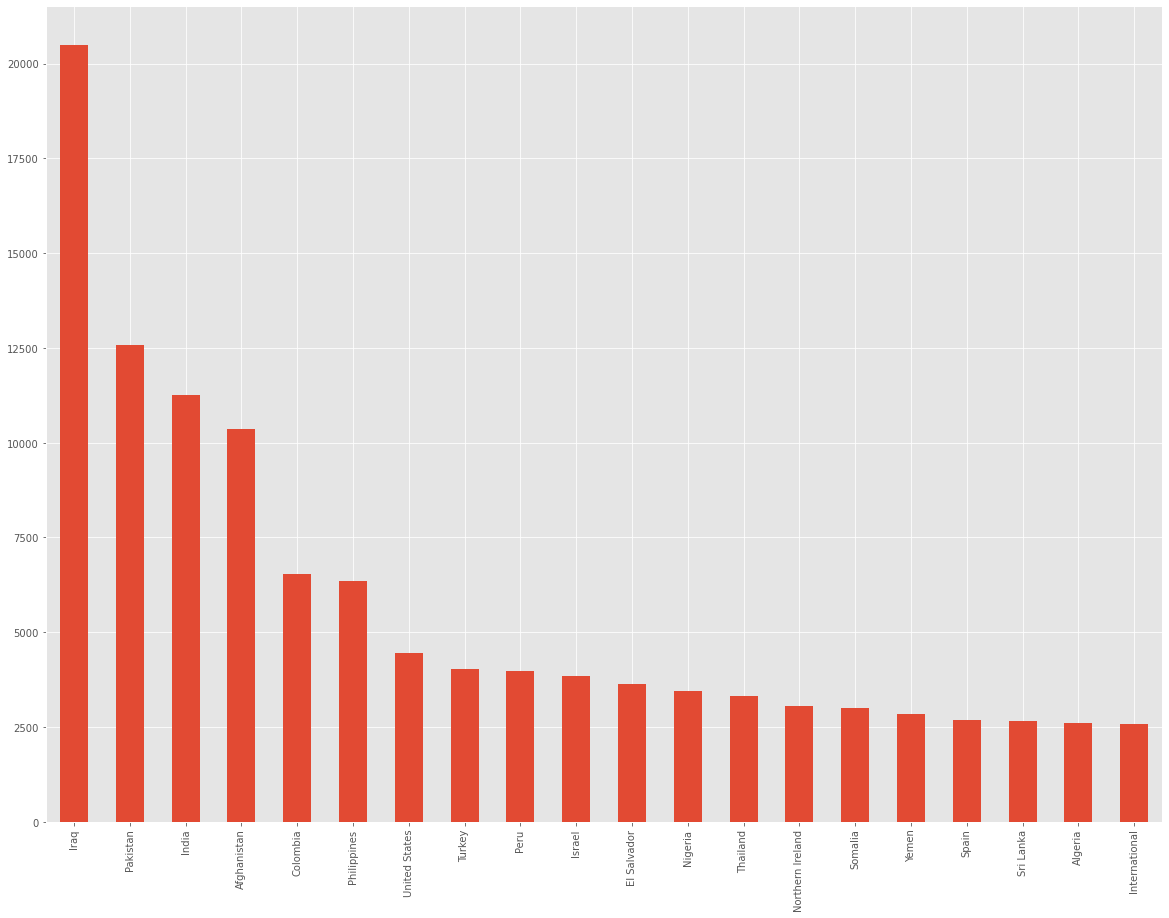

In [22]:
plt.style.use('ggplot')
df['Nationality_target'].value_counts().head(20).plot(kind='bar',figsize=[20,15])

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

### Encoding data

In [24]:
X=df.drop(['Success','City'],axis=1)
y=df['Success']

In [25]:
X.head()

,Year,Month,Day,Extended,Country,Region,Suicide,Attack_Type,Target_Type,individual,Nationality_target,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,0,Dominican Republic,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),0,Belgium,23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,0,United States,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),0,United States,Unknown,Explosives,0.0
4,1970,1,0,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),0,United States,Unknown,Incendiary,0.0


In [26]:
cat_cols=['Nationality_target','Attack_Group','Weapon','Country','Region','Attack_Type','Target_Type']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [27]:
X

,Year,Month,Day,Extended,Country,Region,Suicide,Attack_Type,Target_Type,individual,Nationality_target,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,47,1,0,1,13,0,50,1870,10,1.0
1,1970,0,0,0,116,6,0,6,5,0,16,13,10,0.0
2,1970,1,0,0,140,9,0,1,7,0,199,3341,10,1.0
3,1970,1,0,0,68,11,0,2,5,0,199,3341,2,0.0
4,1970,1,0,0,90,3,0,3,5,0,199,3341,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,159,10,0,0,9,0,169,175,4,1.0
181687,2017,12,31,0,175,5,0,2,9,0,155,2099,2,2.0
181688,2017,12,31,0,140,9,0,3,13,0,147,592,5,0.0
181689,2017,12,31,0,80,8,0,2,6,0,82,3341,2,0.0


### Feature Engineering

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

tree=ExtraTreesClassifier(n_estimators=10)
tree.fit(X,y)

ExtraTreesClassifier(n_estimators=10)

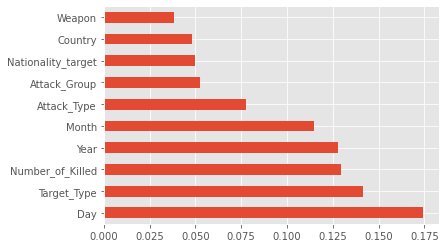

In [29]:
feat_imp=pd.Series(tree.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

### Data modeling
- Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=44)

In [31]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()

In [32]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [33]:
y_pred=pipe.predict(X_test)

In [34]:
print('LR Train Score is : ' , pipe.score(X_train, y_train))
print('LR Test Score is : ' , pipe.score(X_test, y_test))

LR Train Score is :  0.8864875731912648
LR Test Score is :  0.8873950846861336


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("MSE:- ",mean_squared_error(y_test,y_pred))
print("MAE:- ",mean_absolute_error(y_test,y_pred))
print("R2:- ",r2_score(y_test,y_pred))

MSE:-  0.11260491531386642
MAE:-  0.11260491531386642
R2:-  -0.1266742573172419


- KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[  921  3561]
 [  846 34466]]
Outcome values : 
 921 3561 846 34466
Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.21      0.29      4482
           1       0.91      0.98      0.94     35312

    accuracy                           0.89     39794
   macro avg       0.71      0.59      0.62     39794
weighted avg       0.86      0.89      0.87     39794



In [40]:
from sklearn.metrics import accuracy_score
print('KNN Train Score is : ' , knn.score(X_train, y_train))
print('KNN Test Score is : ' , knn.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('KNN Model accuracy is: ', accuracy)

KNN Train Score is :  0.8999907856490672
KNN Test Score is :  0.8892546615067598
KNN Model accuracy is:  0.8892546615067598


- RF

In [41]:
from sklearn.ensemble import RandomForestClassifier

rcr=RandomForestClassifier(random_state=42)

rcr.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred=rcr.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 2047  2435]
 [  663 34649]]
Outcome values : 
 2047 2435 663 34649
Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.46      0.57      4482
           1       0.93      0.98      0.96     35312

    accuracy                           0.92     39794
   macro avg       0.84      0.72      0.76     39794
weighted avg       0.91      0.92      0.91     39794



In [43]:
print('RF Train Score is : ' , rcr.score(X_train, y_train))
print('RF Test Score is : ' , rcr.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('RF Model accuracy is: ', accuracy)

RF Train Score is :  0.9968168605868704
RF Test Score is :  0.922149067698648
RF Model accuracy is:  0.922149067698648


- GradientBoosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth=5,random_state=42) 
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [45]:
y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)
print('Predicted Value for GradientBoosting is : ' , y_pred[:2])
print('Prediction Probabilities Value for GradientBoosting is : ' , y_pred_prob[:5])

Predicted Value for GradientBoosting is :  [1 1]
Prediction Probabilities Value for GradientBoosting is :  [[0.0089939  0.9910061 ]
 [0.00716917 0.99283083]
 [0.08063912 0.91936088]
 [0.12041958 0.87958042]
 [0.14730627 0.85269373]]


In [46]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 1793  2689]
 [  430 34882]]
Outcome values : 
 1793 2689 430 34882
Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.40      0.53      4482
           1       0.93      0.99      0.96     35312

    accuracy                           0.92     39794
   macro avg       0.87      0.69      0.75     39794
weighted avg       0.91      0.92      0.91     39794



In [47]:
print('GradientBoosting Train Score is : ' , gb.score(X_train, y_train))
print('GradientBoosting Test Score is : ' , gb.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('GradientBoosting Model accuracy is: ', accuracy)

GradientBoosting Train Score is :  0.9240821249968587
GradientBoosting Test Score is :  0.9216213499522541
GradientBoosting Model accuracy is:  0.9216213499522541


In [48]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rcr, pickle_out)
pickle_out.close()

In [61]:
prediction = rcr.predict([[2004,7,3,0,2,5,0,6,2,0,89,3341,10,0.0]])

In [62]:
prediction[0]

1

In [66]:
X_train.columns

Index(['Year', 'Month', 'Day', 'Extended', 'Country', 'Region', 'Suicide',
       'Attack_Type', 'Target_Type', 'individual', 'Nationality_target',
       'Attack_Group', 'Weapon', 'Number_of_Killed'],
      dtype='object')

### Evaluating 
- by looking at the all the trained models and theirs performances we can say that the Random Forest Classifier is providing better performance than others